# [作業目標]
- 對資料做更多處理 : 顯示特定欄位的統計值與直方圖

# [作業重點]
- 試著顯示特定欄位的基礎統計數值 (In[4], Out[4], Hint : describe())
- 試著顯示特定欄位的直方圖 (In[5], Out[5], Hint : .hist())

In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd

# 設定 data_path
dir_data = './Part01/'

In [2]:
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
print (app_train.head)

<bound method NDFrame.head of         SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
5           100008       0         Cash loans           M            N   
6           100009       0         Cash loans           F            Y   
7           100010       0         Cash loans           M            Y   
8           100011       0         Cash loans           F            N   
9           100012       0    Revolving loans           M            N   
10          100014       0         Cash loans           F            N   
11          100015       0         Cash loans           F            N   
12      

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

## 練習時間

觀察有興趣的欄位的資料分佈，並嘗試找出有趣的訊息
#### Eg
- 計算任意欄位的平均數及標準差
- 畫出任意欄位的[直方圖](https://zh.wikipedia.org/zh-tw/%E7%9B%B4%E6%96%B9%E5%9B%BE)

### Hints:
- [Descriptive Statistics For pandas Dataframe](https://chrisalbon.com/python/data_wrangling/pandas_dataframe_descriptive_stats/)
- [pandas 中的繪圖函數](https://amaozhao.gitbooks.io/pandas-notebook/content/pandas%E4%B8%AD%E7%9A%84%E7%BB%98%E5%9B%BE%E5%87%BD%E6%95%B0.html)


          SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05  

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000238C6FF6240>]],
      dtype=object)

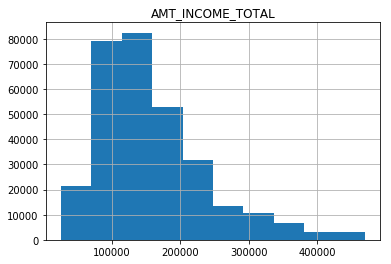

In [24]:
print (app_train.describe())
train_mean = app_train['AMT_INCOME_TOTAL'].mean()
train_std = app_train['AMT_INCOME_TOTAL'].std()
print (train_mean)
print (train_std)
half_std = train_std/2
output = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
for i in app_train['AMT_INCOME_TOTAL']:
    if i < train_mean - half_std * 4:
        output[0]+=1
    elif train_mean - half_std * 4 <= i and i < train_mean - half_std * 3:
        output[1]+=1
    elif train_mean - half_std * 3 <= i and i < train_mean - half_std * 2:
        output[2]+=1
    elif train_mean - half_std * 2 <= i and i < train_mean - half_std * 1:
        output[3]+=1
    elif train_mean - half_std * 1 <= i and i < train_mean:
        output[4]+=1
    elif train_mean <= i and i < train_mean + half_std:
        output[5]+=1
    elif train_mean + half_std <= i and i < train_mean + half_std * 2:
        output[6]+=1
    elif train_mean + half_std * 2 <= i and i < train_mean + half_std * 3:
        output[7]+=1
    elif train_mean + half_std * 3 <= i and i < train_mean + half_std * 4:
        output[8]+=1
    elif train_mean + half_std * 4 <= i:
        output[9]+=1
    
print (output)
print (sum(output))


app_train.loc[app_train['AMT_INCOME_TOTAL']<app_train['AMT_INCOME_TOTAL'].quantile(0.99), ['AMT_INCOME_TOTAL']].hist()


#plt.hist(app_train['AMT_INCOME_TOTAL'])
#plt.show()
#plt.hist(output)
#plt.show()
#output = pd.DataFrame(output)

#plt.hist(output)
#plt.show()

#print (output[0])